In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('student-mat.csv', sep = ';') 

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Encode Categorical Columns

### Q. Why I use .map() for these columns?

These columns has only two value also called as binary nominal.
If i use onehotencoding for these columns it create unnecessary columns.

For Example - 'Internet' has two value 'yes' and 'no' if i use onehotencoding it create two column like --

firstcolumn - yes      secondcolumn- no
    

              1                      0
              0                      1

In [8]:
binary_columns = ['sex', 'address', 'famsize', 'Pstatus',
               'schoolsup', 'famsup', 'paid', 'activities',
               'higher', 'internet', 'romantic']

for cols in binary_columns:
    data[cols] = data[cols].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'LE3': 0, 'GT3': 1, 'U': 1, 'R': 0, 'T': 1, 'A': 0})

#### One Hot Encoding

In [9]:
multi_cat_cols = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']
data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True, dtype = int) 

In [10]:
data.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,1,1,0,4,4,2,2,0,...,0,0,0,0,1,0,0,0,1,0
1,0,17,1,1,1,1,1,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,15,1,0,1,1,1,1,2,3,...,0,0,1,0,0,0,1,0,1,0
3,0,15,1,1,1,4,2,1,3,0,...,0,0,0,1,0,1,0,0,1,0
4,0,16,1,1,1,3,3,1,2,0,...,0,0,1,0,0,1,0,0,0,0


#### Train Test Split

In [11]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
X = data.drop('G3', axis = 1)
Y = data['G3'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#### Standard Scaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


### Linear Regression Model
##### Fit the Model

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Prediction on test set 

In [16]:
y_predict = lr.predict(X_test_scaled)

### Evaluate the Model

In [17]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.3394159082670924
Mean Squared Error (MSE): 4.466503212015603
Root Mean Squared Error (RMSE): 2.113410327412924
R² Score: 0.7821754247320556


### Visual Actual Vs Predicted 

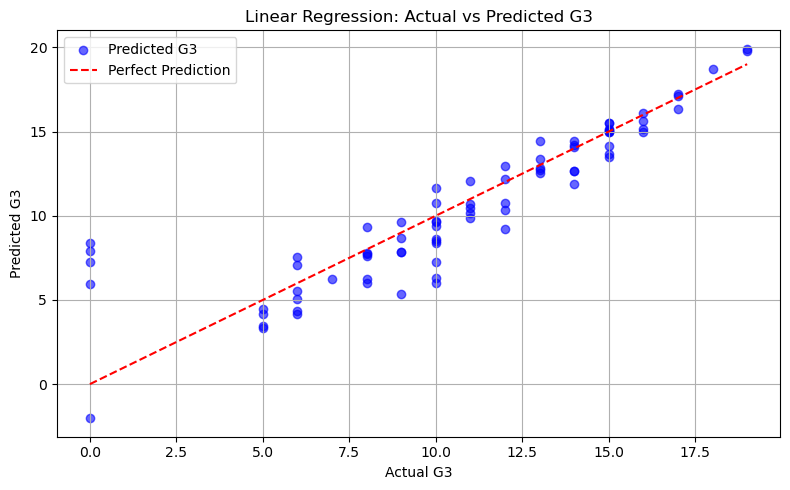

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, color='blue', alpha=0.6, label='Predicted G3')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression: Actual vs Predicted G3")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
